You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%202-%20Setting%20up%20DF%20environment/module2_ts_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series basics in python

## Introduction 

In this notebook, we will explore the basics of time series analysis using Python. We will be using two datasets:

1. The airline passenger dataset, which records the monthly number of passengers from 1949 to 1960.
2. The AAPL stock dataset, which we will obtain using the yfinance library.

## Importing libraries
In this notebook, we will be using PyCaret, a powerful library that integrates several essential tools and libraries for time series analysis. To ensure a smooth setup, I highly recommend setting up PyCaret in a separate environment. This helps in managing dependencies and avoiding conflicts with other projects. For detailed instructions on setting up PyCaret, you can refer to my YouTube playlist for PyCaret.
https://www.youtube.com/playlist?list=PL2GWo47BFyUOqCAj_16yeNspfeM0nfA6q


If you are using Google Colab, make sure to install PyCaret as well. For this notebook, we will use the light version of PyCaret, which includes the necessary functionalities for our analysis.

https://pycaret.gitbook.io/docs/get-started/installation

In [1]:
# Run this cell only if you are using Google Colab
# If you are running on your local Jupyter notebook, do not run this cell
# !pip install pycaret
# !pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [4]:
airpass = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col='Month')
airpass.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
aapl = yf.download('AAPL', start='2021-12-22', end='2024-05-01')

# UPDATED: Flatten MultiIndex columns from yfinance (new format returns Price/Ticker levels)
if isinstance(aapl.columns, pd.MultiIndex):
    aapl.columns = aapl.columns.get_level_values(0)

aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2021-12-22,172.031204,172.246685,168.612906,169.484619,92135300
2021-12-23,172.658035,173.216331,171.668793,172.236878,68356600
2021-12-27,176.624832,176.712979,173.431819,173.451398,74919600
2021-12-28,175.606155,177.604248,174.861776,176.458290,79144300
2021-12-29,175.694397,176.918714,174.479869,175.645421,62348900


In [6]:
aapl_close = aapl[['Close']].copy()
aapl_close.head()

Price,Close
Date,
2021-12-22,172.031204
2021-12-23,172.658035
2021-12-27,176.624832
2021-12-28,175.606155
2021-12-29,175.694397


**Ensuring the Time Index is Correct**

After importing the datasets, we need to make sure the time index is correctly set to a datetime format. This is essential for performing time series analysis, as the datetime index allows us to leverage pandas' powerful time series functionalities.

In [7]:
airpass.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='str', name='Month', length=144)

In [8]:
# Convert the 'Month' column to datetime format
airpass.index = pd.to_datetime(airpass.index).to_period('M')

airpass.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

The AAPL stock data fetched using **yfinance** is already in the correct format with the 'Date' column set as the index. However, the index frequency is not specified. We need to set it to business day frequency and handle missing values by forward filling.

In [9]:
# Convert the index to a datetime index if it's not already
aapl_close.index = pd.to_datetime(aapl_close.index)
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03',
               '2022-01-04', '2022-01-05',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[s]', name='Date', length=591, freq=None)

In [10]:
# Set the index frequency to business day
aapl_close = aapl_close.asfreq('B')
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[s]', name='Date', length=615, freq='B')

In [11]:
# UPDATED: Use ffill() instead of deprecated fillna(method='ffill')
aapl_close = aapl_close.ffill()

aapl_close.head()  # pay attention to the inferred data for Christmas Eve which the market is closed

Price,Close
Date,
2021-12-22,172.031204
2021-12-23,172.658035
2021-12-24,172.658035
2021-12-27,176.624832
2021-12-28,175.606155


### Data Exploration 

Now that our time index is correctly set, we can proceed with exploring the datasets. This includes checking for any missing values and understanding the basic structure and statistics of our data.

In [12]:
# Check for missing values in both datasets
print("Missing values in Airline Passengers Data:")
print(airpass.isnull().sum())

print("\nMissing values in AAPL Stock Data:")
print(aapl_close.isnull().sum())

Missing values in Airline Passengers Data:
Passengers    0
dtype: int64

Missing values in AAPL Stock Data:
Price
Close    0
dtype: int64


In [13]:
# Display the summary statistics of both datasets
print("\nSummary statistics for Airline Passengers Data:")
print(airpass.describe())
print(airpass.info())

print("\nSummary statistics for AAPL Stock Data:")
print(aapl_close.describe())
print(aapl_close.info())


Summary statistics for Airline Passengers Data:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
<class 'pandas.DataFrame'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary statistics for AAPL Stock Data:
Price       Close
count  615.000000
mean   163.653288
std     17.708077
min    123.161934
25%    148.858780
50%    166.422394
75%    176.556686
max    196.256561
<class 'pandas.DataFrame'>
DatetimeIndex: 615 entries, 2021-12-22 to 2024-04-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   615 non-null    float64
dtypes: float64(1)
memory usage: 9.6 KB
None


In [14]:
airpass.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

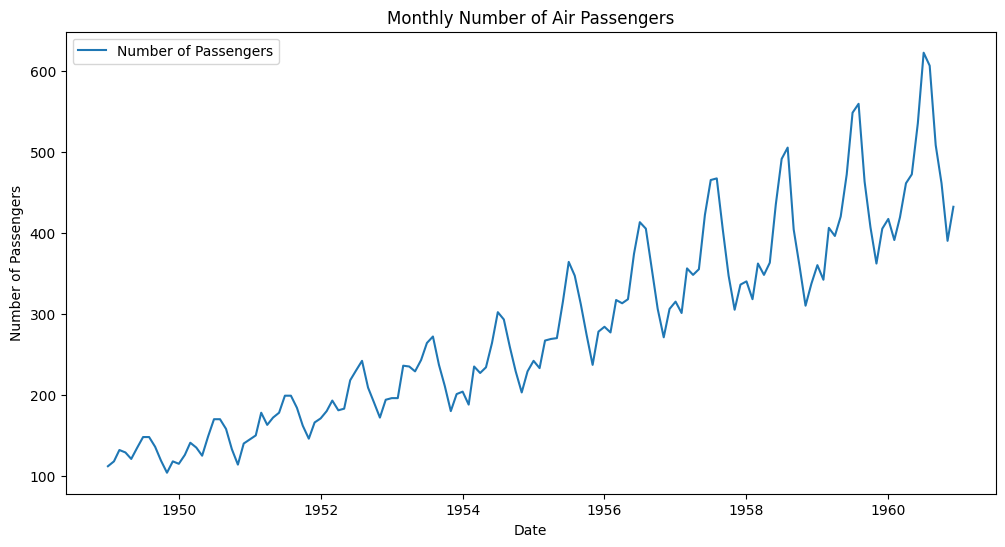

In [15]:
# Plot the airline passengers time series data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['Passengers'], label='Number of Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

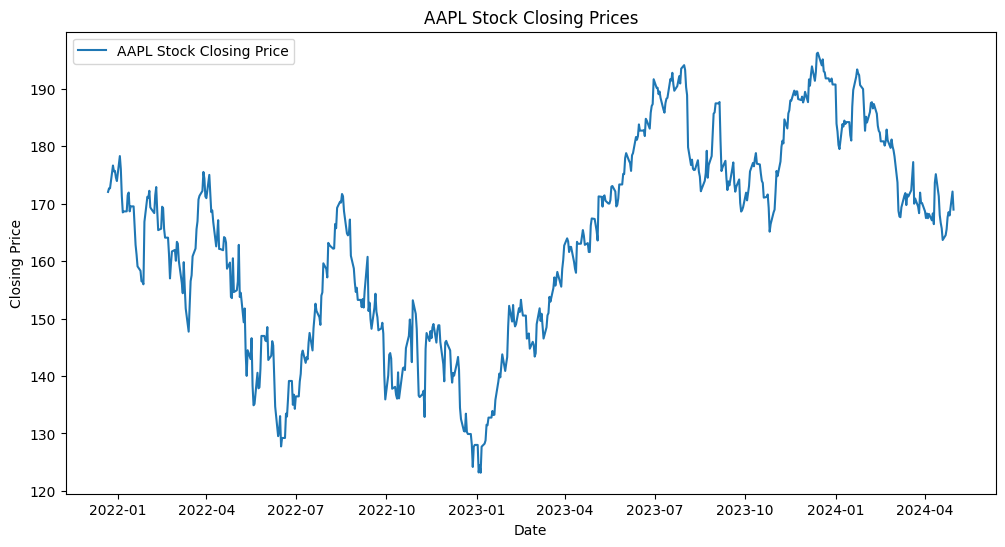

In [16]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Data transformation 

To simplify the patterns in the historical data and make them more consistent across the entire dataset, we will apply various mathematical transformations to the airline passenger data. Transformations can help in stabilizing the variance and making the data more suitable for modeling. 

However, it's important to note that these transformations can significantly alter the interpretation of the data, so they should be used with caution. We will try multiple transformations and compare the results to determine which is most appropriate for our data.

### Logorithmic Transformation

The logarithmic transformation helps in stabilizing the variance of the time series data, particularly when the data spans several orders of magnitude.

         Passengers  Log_Passengers
Month                              
1949-01         112        4.718499
1949-02         118        4.770685
1949-03         132        4.882802
1949-04         129        4.859812
1949-05         121        4.795791


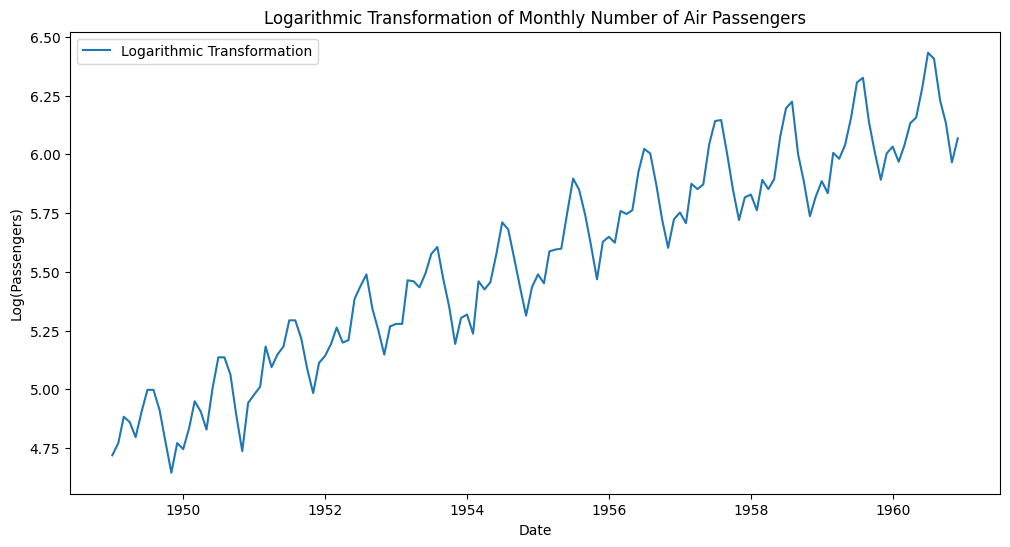

In [17]:
# Apply logarithmic transformation
airpass['Log_Passengers'] = np.log(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['Log_Passengers'], label='Logarithmic Transformation')
plt.title('Logarithmic Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.legend()
plt.show()

### Power transformation 
A power transformation, such as the square root transformation, can also help in stabilizing the variance and making the data more normally distributed.

         Passengers  Log_Passengers  Sqrt_Passengers
Month                                               
1949-01         112        4.718499        10.583005
1949-02         118        4.770685        10.862780
1949-03         132        4.882802        11.489125
1949-04         129        4.859812        11.357817
1949-05         121        4.795791        11.000000


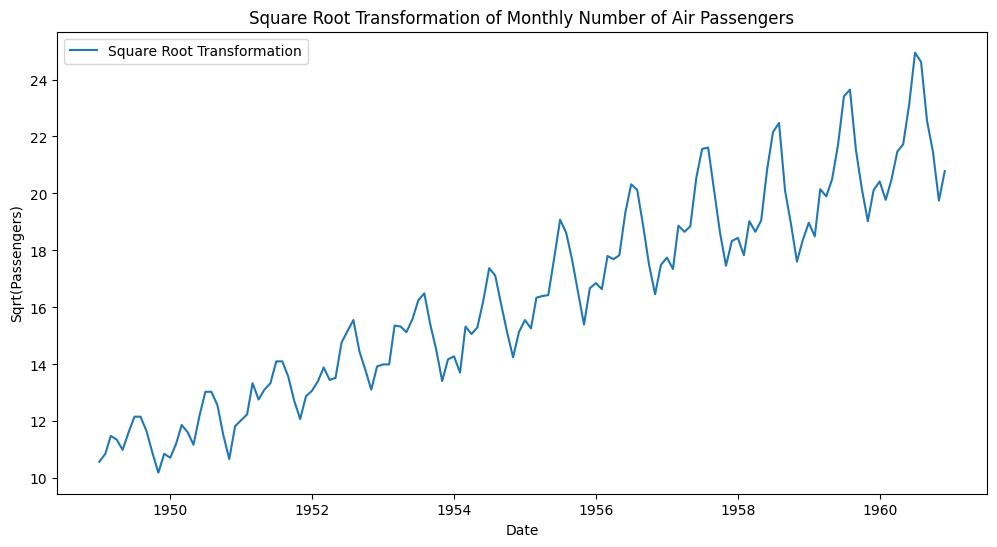

In [18]:
# Apply square root transformation
airpass['Sqrt_Passengers'] = np.sqrt(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['Sqrt_Passengers'], label='Square Root Transformation')
plt.title('Square Root Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Sqrt(Passengers)')
plt.legend()
plt.show()

### Box-Cox Transformation

The Box-Cox transformation is a more flexible transformation that can handle a wide range of data distributions. It requires all values to be positive, which our dataset already satisfies.


The Box-Cox transformation is defined as:

$ y(\lambda) = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(y) & \text{if } \lambda = 0 
\end{cases}
$

Where:
- $( y )$ is the original data.
- $( \lambda )$ is the transformation parameter.

the Transformation parameter detemines the nature of the transformation: 
- $\lambda = 1$  No transformation (the data remains unchanged).
- $\lambda = 0$  Logarithmic transformation.
- $\lambda = 0.5$  Square root transformation.

- Optimized $\lambda$ : The scipy.stats package provides a method to find the optimal value of 
$\lambda$ that maximizes the log-likelihood function of the transformed data.  This means that the transformed data is as close to normally distributed as possible, with stabilized variance. This is done using the boxcox function, which returns both the transformed data and the optimal $\lambda$

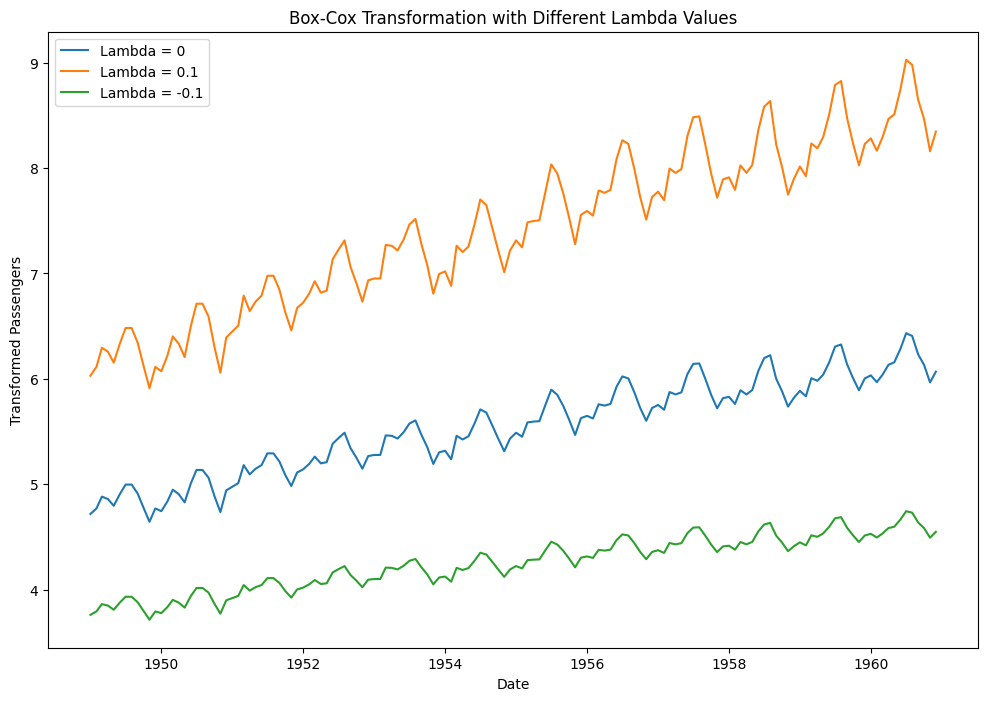

In [19]:
# Let's start by defining our own boxcox transformation function 

def boxcox_transform_and_plot(data, lambda_values):
    """
    Apply Box-Cox transformation to the data for different lambda values and plot the results.
    
    Parameters:
    data (pd.Series): The input time series data.
    lambda_values (list): A list of lambda values for the Box-Cox transformation.
    """
    plt.figure(figsize=(12, 8))
    
    for lmbda in lambda_values:
        if lmbda == 0:
            transformed_data = np.log(data)
        else:
            transformed_data = (data**lmbda - 1) / lmbda
        
        plt.plot(data.index.to_timestamp(), transformed_data, label=f'Lambda = {lmbda}')
    
    plt.title('Box-Cox Transformation with Different Lambda Values')
    plt.xlabel('Date')
    plt.ylabel('Transformed Passengers')
    plt.legend()
    plt.show()

# List of lambda values to visualize
lambda_values = [0, 0.1, -0.1] # you can try 1 to get the original data. 

# Apply the function to the airline passenger data
boxcox_transform_and_plot(airpass['Passengers'], lambda_values)

In [20]:
from scipy.stats import boxcox

         Passengers  Log_Passengers  Sqrt_Passengers  boxcox_Passengers
Month                                                                  
1949-01         112        4.718499        10.583005           6.827491
1949-02         118        4.770685        10.862780           6.932823
1949-03         132        4.882802        11.489125           7.161892
1949-04         129        4.859812        11.357817           7.114611
1949-05         121        4.795791        11.000000           6.983788


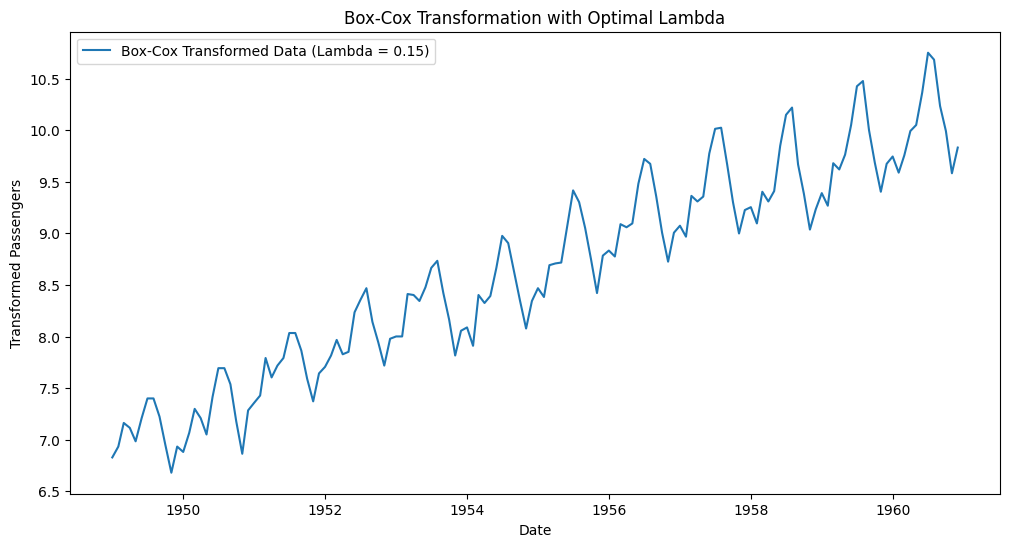

The optimal lambda for Box-Cox transformation is: 0.1480226858137178


In [21]:
# Apply Box-Cox transformation to find the optimal lambda
airpass['boxcox_Passengers'] , optimal_lambda = boxcox(airpass.Passengers)
print(airpass.head())

# Plot the transformed data with optimal lambda
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['boxcox_Passengers'] , label=f'Box-Cox Transformed Data (Lambda = {optimal_lambda:.2f})')
plt.title('Box-Cox Transformation with Optimal Lambda')
plt.xlabel('Date')
plt.ylabel('Transformed Passengers')
plt.legend()
plt.show()

# Print the optimal lambda
print(f'The optimal lambda for Box-Cox transformation is: {optimal_lambda}')

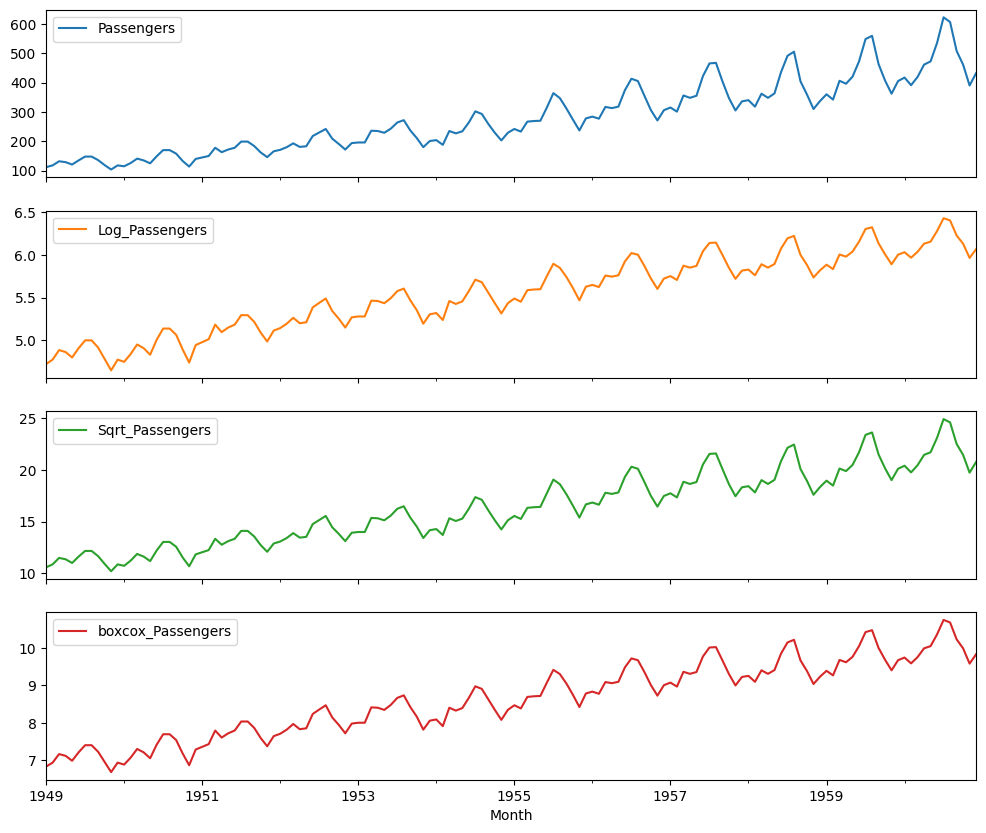

In [22]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

**Summary**: Data transformation can enhance model performance and stability by:
- Stabilizing Variance: Reduces the impact of outliers and makes patterns more consistent.
- Improving Convergence: Especially in deep learning, normalized data speeds up training and leads to better results.
- Not Mandatory for Non-Parametric Models: While beneficial, transformations are not always required for non-parametric models like decision trees.

## ACF and PACF

Autocorrelation and partial autocorrelation plots are essential tools in time series analysis. They help in identifying the dependency between current and past values of the time series, which is crucial for model selection and understanding the underlying structure of the data. 

* ACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* PACF: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

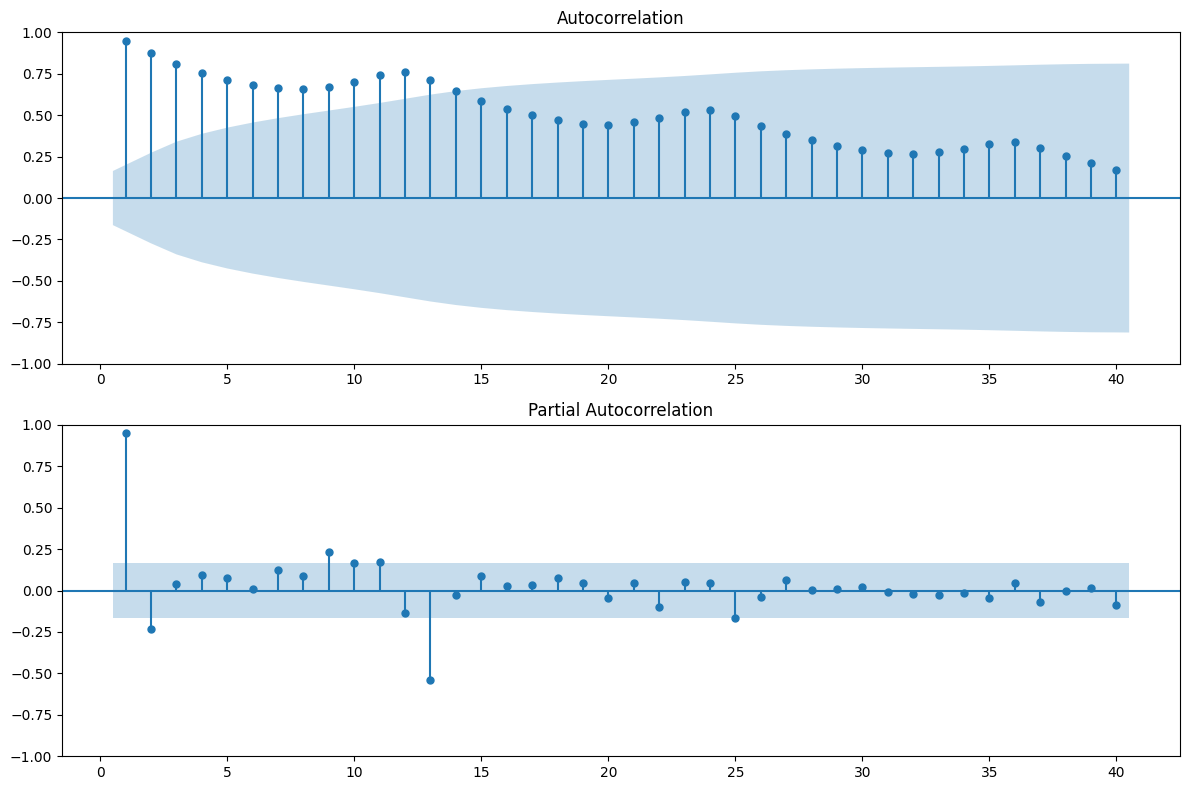

In [24]:
# Plot ACF and PACF for the original airline passenger data
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()

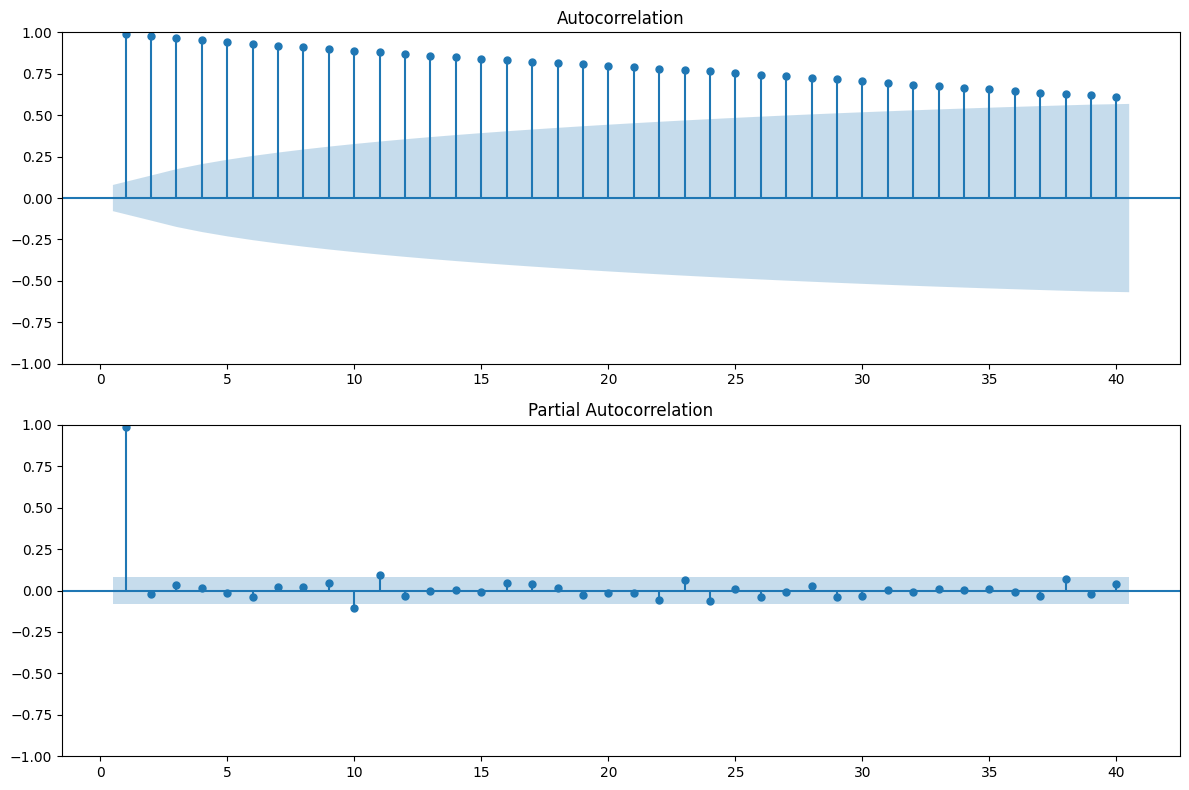

In [25]:
# Plot ACF and PACF for the original AAPL stock closing prices
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(aapl_close['Close'], ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(aapl_close['Close'], ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()

## Stationarity and differencing 

Stationarity is a key assumption in many time series models, including ARIMA. A stationary time series has constant mean and variance over time, and its properties do not depend on the time at which the series is observed. Non-stationary data can lead to unreliable and spurious results, so it's often necessary to transform non-stationary data into a stationary form.

### Augmented Dickey-Fuller (ADF) Test
The ADF test is a statistical test used to check for stationarity. If the p-value of the test is less than a significance level (e.g., 0.05), we reject the null hypothesis that the time series is non-stationary. 

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

### Differencing

Differencing is a common technique to achieve stationarity. It involves subtracting the previous observation from the current observation. This can be repeated (second differencing, etc.) until the series becomes stationary.

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller(airpass.Passengers)

(np.float64(0.815368879206053),
 np.float64(0.9918802434376411),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [27]:
# Function to perform ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is non-stationary.")

# Perform ADF test on original data
adf_test(airpass['Passengers'], title='Airline Passengers - Original')

Augmented Dickey-Fuller Test: Airline Passengers - Original
ADF Test Statistic               0.815369
p-value                          0.991880
# Lags Used                     13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


In [28]:
adf_test(aapl_close['Close'], title='AAPL Stock Closing Prices - Original')

Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Original
ADF Test Statistic              -1.905437
p-value                          0.329507
# Lags Used                      0.000000
Number of Observations Used    614.000000
Critical Value (1%)             -3.441045
Critical Value (5%)             -2.866259
Critical Value (10%)            -2.569283
=> The series is non-stationary.


Now we will difference the data to make it stationary! 

In [29]:
# Differencing the airline passenger data
airpass['Passengers_diff'] = airpass['Passengers'].diff()
airpass.head()

,Passengers,Log_Passengers,Sqrt_Passengers,boxcox_Passengers,Passengers_diff
Month,,,,,
1949-01,112,4.718499,10.583005,6.827491,NaN
1949-02,118,4.770685,10.862780,6.932823,6.0
1949-03,132,4.882802,11.489125,7.161892,14.0
1949-04,129,4.859812,11.357817,7.114611,-3.0
1949-05,121,4.795791,11.000000,6.983788,-8.0


Augmented Dickey-Fuller Test: Airline Passengers - Differenced
ADF Test Statistic              -2.829267
p-value                          0.054213
# Lags Used                     12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


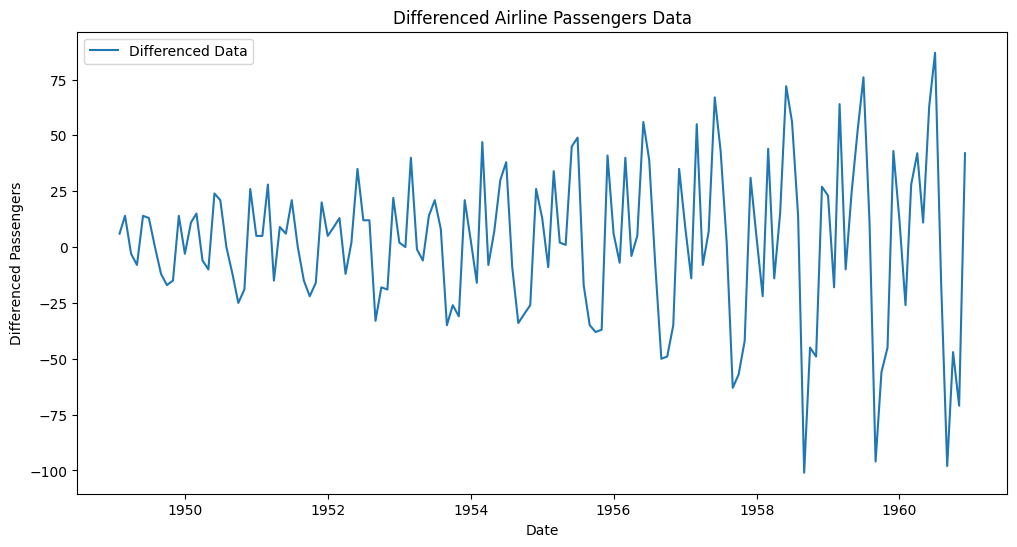

In [30]:
# Perform ADF test on differenced data
adf_test(airpass['Passengers_diff'].dropna(), title='Airline Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['Passengers_diff'], label='Differenced Data')
plt.title('Differenced Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

Augmented Dickey-Fuller Test: Airline boxcox Passengers - Differenced
ADF Test Statistic              -2.871708
p-value                          0.048738
# Lags Used                     14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
=> The series is stationary.


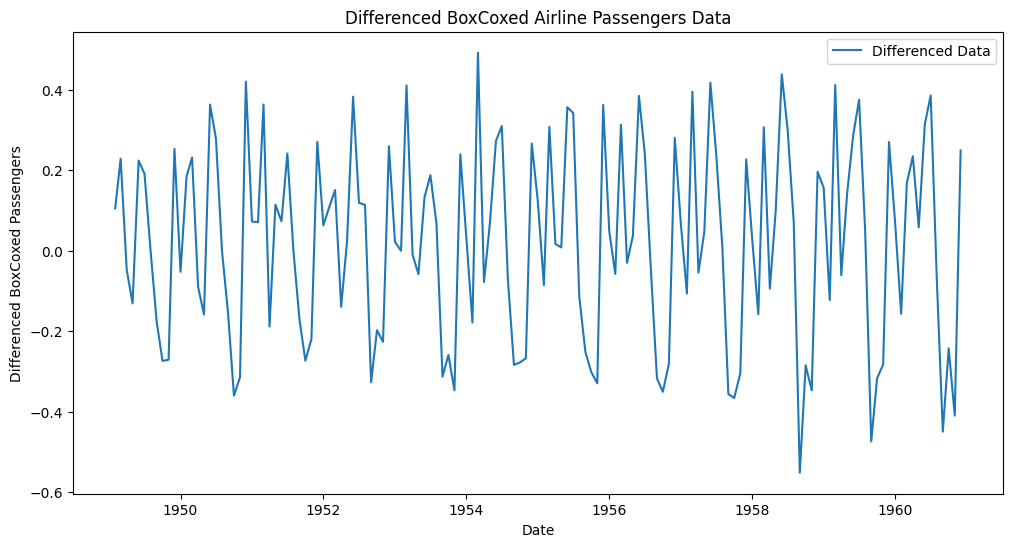

In [31]:
airpass['boxcox_Passengers_diff'] = airpass['boxcox_Passengers'].diff()

# Perform ADF test on differenced data
adf_test(airpass['boxcox_Passengers_diff'].dropna(), title='Airline boxcox Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['boxcox_Passengers_diff'], label='Differenced Data')
plt.title('Differenced BoxCoxed Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced BoxCoxed Passengers')
plt.legend()
plt.show()

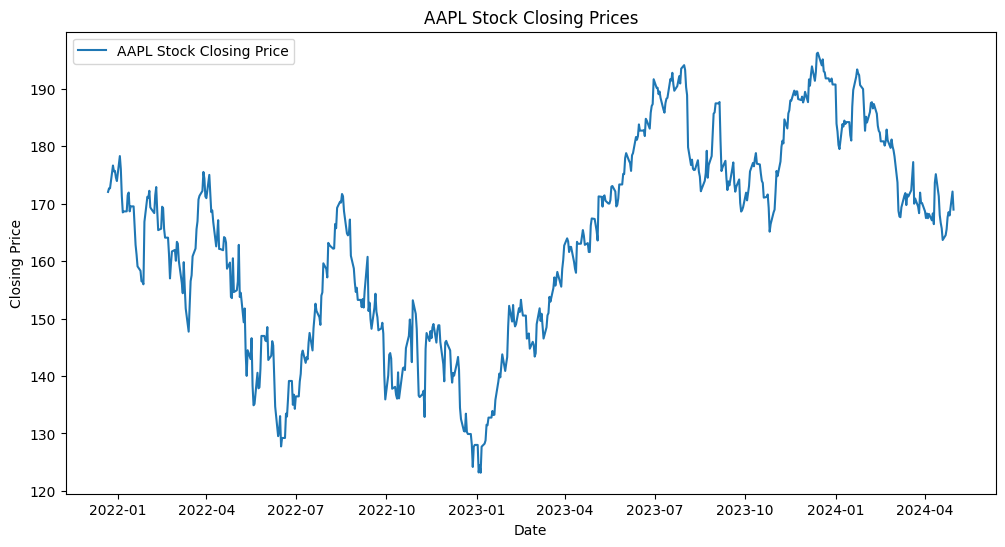

In [32]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Differenced
ADF Test Statistic             -24.483660
p-value                          0.000000
# Lags Used                      0.000000
Number of Observations Used    613.000000
Critical Value (1%)             -3.441063
Critical Value (5%)             -2.866266
Critical Value (10%)            -2.569287
=> The series is stationary.


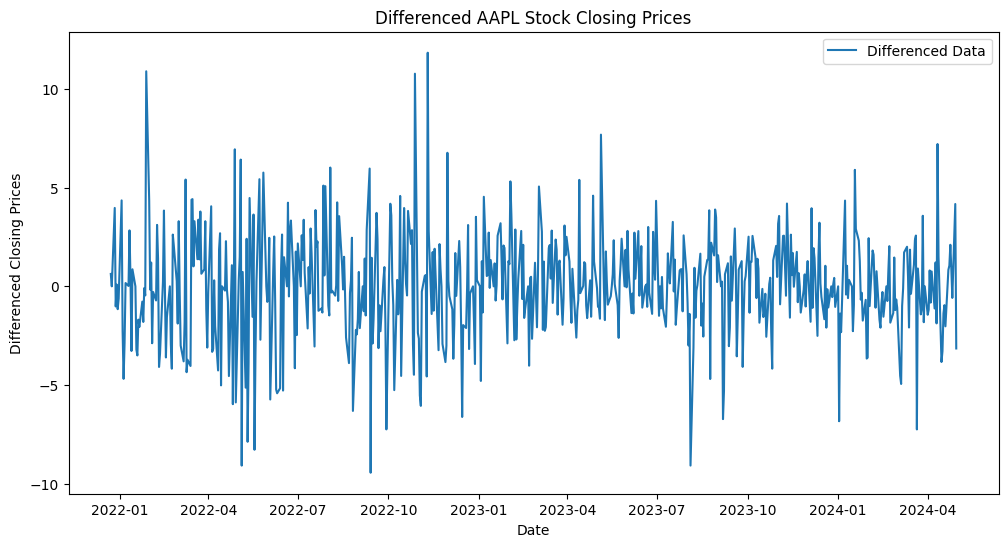

In [33]:
# Differencing the AAPL stock closing prices
aapl_close['Close_diff'] = aapl_close['Close'].diff()

# Perform ADF test on differenced data
adf_test(aapl_close['Close_diff'].dropna(), title='AAPL Stock Closing Prices - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close['Close_diff'], label='Differenced Data')
plt.title('Differenced AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Prices')
plt.legend()
plt.show()

By performing the ADF test, we can determine whether our time series data is stationary. If the series is non-stationary, we apply differencing to transform it into a stationary series. This transformation is essential for making reliable long-term predictions and for the proper functioning of many time series models.

## Seasonal Decomposition: 

Seasonal decomposition is a method that separates a time series into three components: trend, seasonal, and residual. This decomposition helps in understanding the underlying patterns in the data, which is useful for modeling and forecasting. We will use the seasonal_decompose function from the statsmodels library to perform this decomposition.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

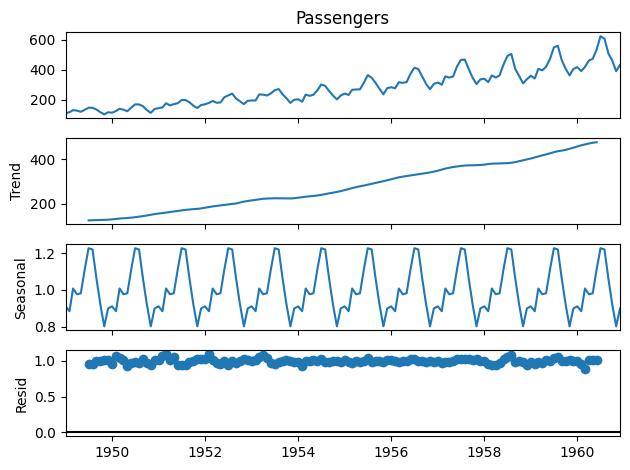

In [35]:
# Perform seasonal decomposition
temp_airpass = airpass.copy()
temp_airpass.index = temp_airpass.index.to_timestamp()

result_airpass = seasonal_decompose(temp_airpass['Passengers'], model='multiplicative')

# Plot the decomposition
result_airpass.plot()
plt.show()

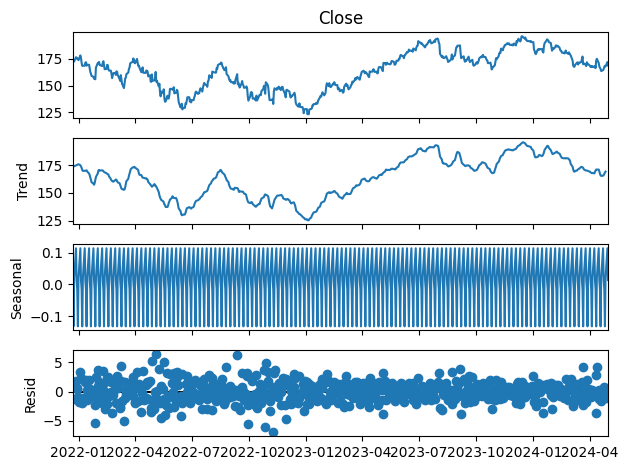

In [36]:
# Perform seasonal decomposition on AAPL closing prices
result_aapl = seasonal_decompose(aapl_close['Close'], model='additive') 

# Plot the decomposition
result_aapl.plot()
plt.show()

**Summary**: In this section, we performed seasonal decomposition on the airline passenger data and AAPL stock closing prices using the seasonal_decompose function from statsmodels. By decomposing the time series into trend, seasonal, and residual components, we can better understand the underlying patterns and behaviors in the data. This decomposition is a crucial step in time series analysis, aiding in both the interpretation and modeling of the data.

## Benchmarking Forecasting Models

In this section, we will create and plot benchmarks against the original airline passenger data. We'll split the data into training and test sets (with the last 24 observations as the test set) and create four benchmark models: naive forecaster, seasonal naive, mean forecast, and drift forecast.



### Multi-Horizon Benchmark: 

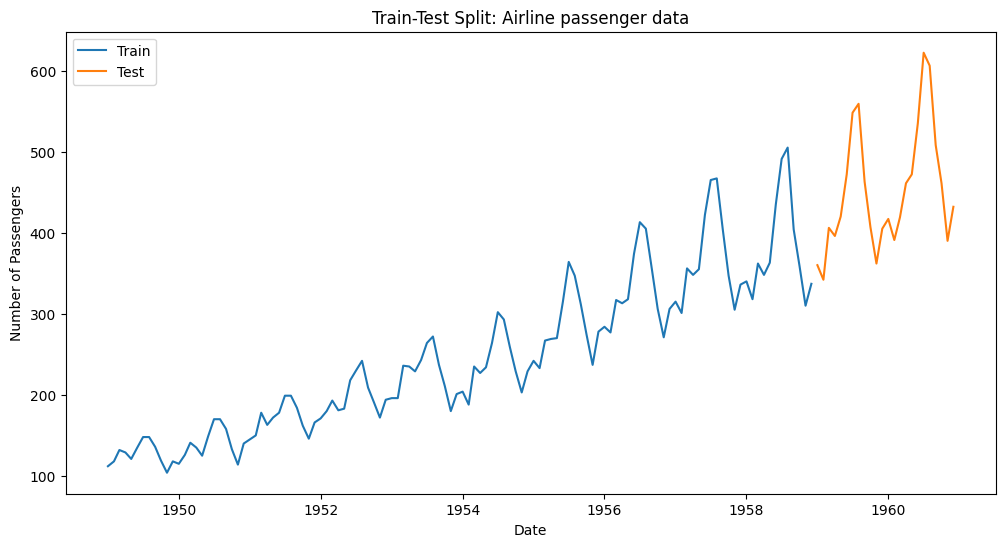

In [37]:
# Split the data
train = airpass[['Passengers']][:-24]
test = airpass[['Passengers']][-24:]

# Visualize the train and test data
plt.figure(figsize=(12, 6))
plt.plot(train.index.to_timestamp(), train, label='Train')
plt.plot(test.index.to_timestamp(), test, label='Test')
plt.title('Train-Test Split: Airline passenger data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

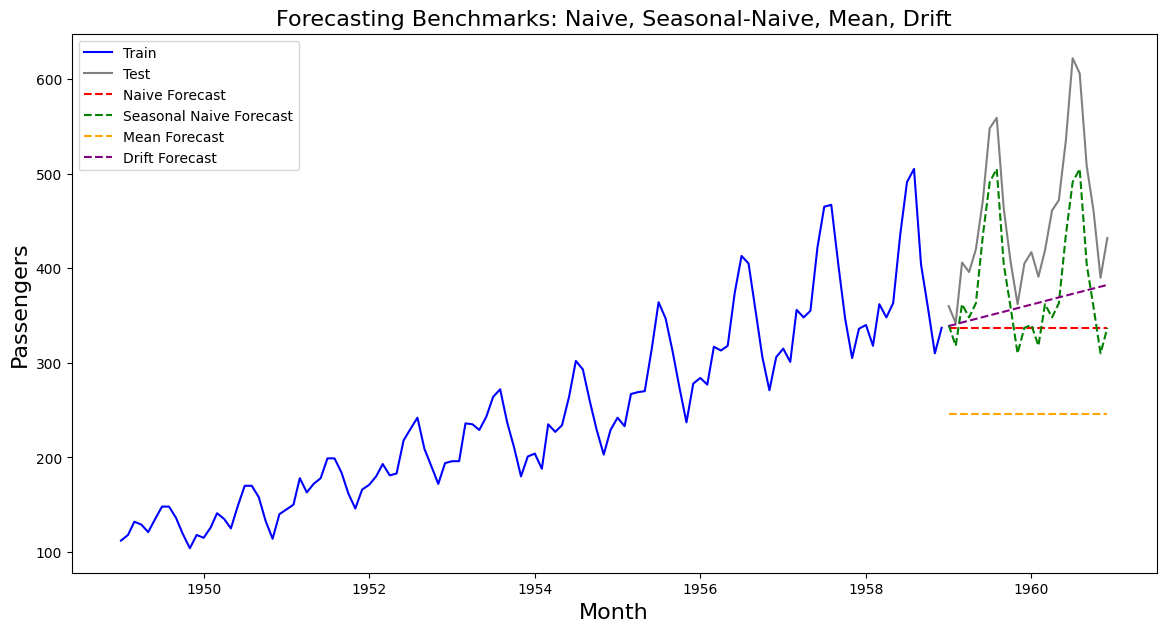

In [38]:
# Naive Forecast
# The naive forecaster simply uses the last observation from the training set
# as the forecast for all future observations.
y_hat_naive = test.copy()
y_hat_naive['naive'] = train.iloc[-1]['Passengers']

# Seasonal Naive Forecast:
# The seasonal naive forecaster uses the observation 
# from the same season of the previous cycle as the forecast.
season_length = 12
train_values_for_snaive = train['Passengers'].values[-season_length:]  # Last season's data
y_hat_snaive = test.copy()
y_hat_snaive['snaive'] = np.tile(train_values_for_snaive, len(test)//season_length+1)[:len(test)]

# Mean Forecast:
# The mean forecaster uses the mean of the training set as the forecast for all future observations.
y_hat_mean = test.copy()
y_hat_mean['mean'] = train['Passengers'].mean()

# Drift Forecast:
# The drift forecaster extrapolates a line between the first and last observations
# in the training set.
y_hat_drift = test.copy()
num_periods = len(train) - 1
drift = (train['Passengers'].iloc[-1] - train['Passengers'].iloc[0]) / num_periods
y_hat_drift['drift'] = [train['Passengers'].iloc[-1] + (i+1) * drift for i in range(len(test))]


# Ensure index types are correct
train.index = pd.to_datetime(train.index.to_timestamp())
test.index = pd.to_datetime(test.index.to_timestamp())
y_hat_naive.index = pd.to_datetime(y_hat_naive.index.to_timestamp())
y_hat_snaive.index = pd.to_datetime(y_hat_snaive.index.to_timestamp())
y_hat_mean.index = pd.to_datetime(y_hat_mean.index.to_timestamp())
y_hat_drift.index = pd.to_datetime(y_hat_drift.index.to_timestamp())

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train', color='blue')
plt.plot(test.index, test['Passengers'], label='Test', color='grey')
plt.plot(y_hat_naive.index, y_hat_naive['naive'], label='Naive Forecast', color='red', linestyle='--')
plt.plot(y_hat_snaive.index, y_hat_snaive['snaive'], label='Seasonal Naive Forecast', color='green', linestyle='--')
plt.plot(y_hat_mean.index, y_hat_mean['mean'], label='Mean Forecast', color='orange', linestyle='--')
plt.plot(y_hat_drift.index, y_hat_drift['drift'], label='Drift Forecast', color='purple', linestyle='--')

plt.title('Forecasting Benchmarks: Naive, Seasonal-Naive, Mean, Drift', fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Passengers',fontsize=16)
plt.legend(loc='upper left')
plt.show()

### One-step ahead Benchmark

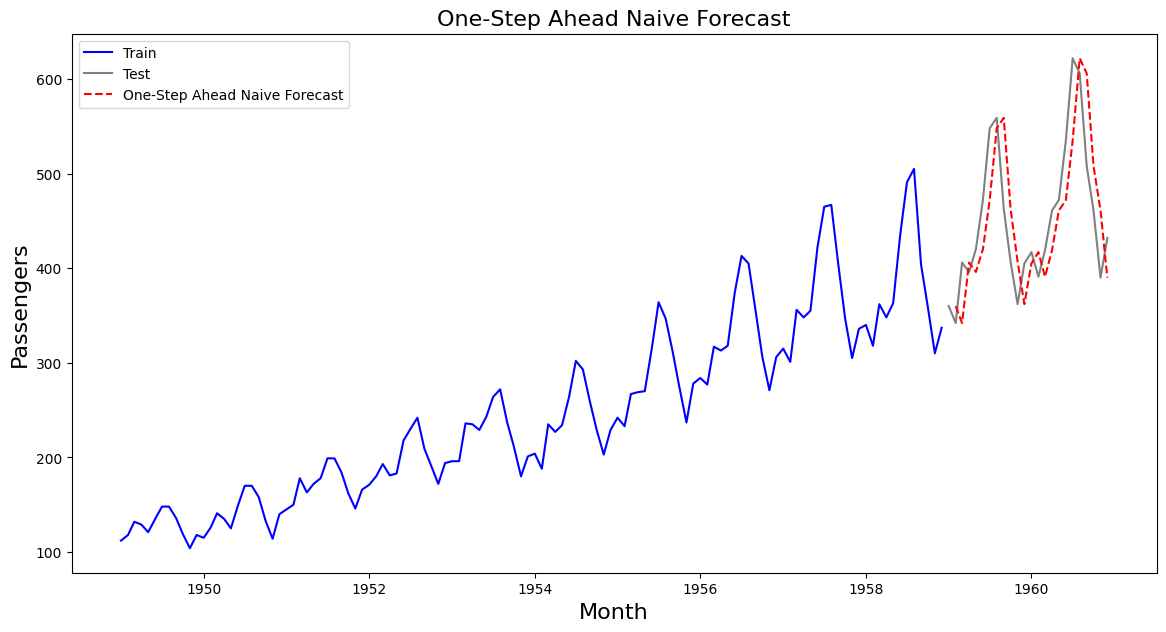

In [39]:
# Correcting the Naive Forecast for a true one-step ahead visualization
y_hat_naive_corrected = airpass.copy()
y_hat_naive_corrected['naive_one_step'] = airpass['Passengers'].shift(1)

# Adjusting visualization to focus on one-step ahead naive forecast in the test set
plt.figure(figsize=(14, 7))

# Original data (Train and Test)
plt.plot(train.index, train['Passengers'], label='Train', color='blue')
plt.plot(test.index, test['Passengers'], label='Test', color='grey')

# One-step ahead naive forecast (Test set only)
# Shifting the test data one step for the naive forecast
test_shifted_for_naive = test['Passengers'].shift(1)
plt.plot(test.index, test_shifted_for_naive, label='One-Step Ahead Naive Forecast', color='red', linestyle='--')

plt.title('One-Step Ahead Naive Forecast', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers',fontsize=16)
plt.legend(loc='upper left')
plt.show()

### Exercise: Creating Benchmark Forecasts for Stock Price Data
In this exercise, you will replicate the process of creating benchmark forecasts for the AAPL stock closing prices. You will split the data into training and test sets and create four benchmark models: naive forecaster, seasonal naive forecaster, mean forecaster, and drift forecaster. Finally, you will plot these benchmarks against the original data.

---
## Exercise Solution: AAPL Stock Price Benchmark Forecasts

In [40]:
# Use aapl_close which has been properly processed with business day frequency
# Split the data - using last 60 business days (~3 months) as test set
test_size = 60

train_aapl = aapl_close[['Close']][:-test_size].copy()
test_aapl = aapl_close[['Close']][-test_size:].copy()

print(f"Training set: {train_aapl.index[0]} to {train_aapl.index[-1]} ({len(train_aapl)} observations)")
print(f"Test set: {test_aapl.index[0]} to {test_aapl.index[-1]} ({len(test_aapl)} observations)")

Training set: 2021-12-22 00:00:00 to 2024-02-06 00:00:00 (555 observations)
Test set: 2024-02-07 00:00:00 to 2024-04-30 00:00:00 (60 observations)


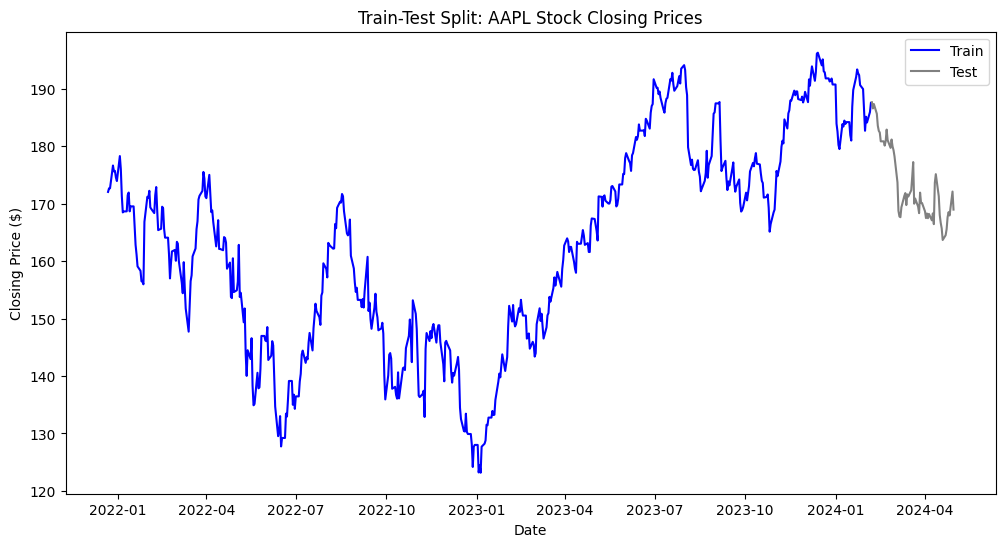

In [41]:
# Visualize the train and test data
plt.figure(figsize=(12, 6))
plt.plot(train_aapl.index, train_aapl['Close'], label='Train', color='blue')
plt.plot(test_aapl.index, test_aapl['Close'], label='Test', color='grey')
plt.title('Train-Test Split: AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [42]:
# 1. Naive Forecast
# Uses the last observation from training set for all future predictions
y_hat_naive_aapl = test_aapl.copy()
y_hat_naive_aapl['naive'] = train_aapl.iloc[-1]['Close']

# 2. Seasonal Naive Forecast
# For stock data, we use 5 business days (1 week) as the "season"
# This captures weekly patterns in stock prices
season_length_aapl = 5  # 5 business days = 1 week
train_values_for_snaive_aapl = train_aapl['Close'].values[-season_length_aapl:]
y_hat_snaive_aapl = test_aapl.copy()
y_hat_snaive_aapl['snaive'] = np.tile(train_values_for_snaive_aapl, len(test_aapl)//season_length_aapl + 1)[:len(test_aapl)]

# 3. Mean Forecast
# Uses the mean of training data for all predictions
y_hat_mean_aapl = test_aapl.copy()
y_hat_mean_aapl['mean'] = train_aapl['Close'].mean()

# 4. Drift Forecast
# Extrapolates a line between first and last training observations
y_hat_drift_aapl = test_aapl.copy()
num_periods_aapl = len(train_aapl) - 1
drift_aapl = (train_aapl['Close'].iloc[-1] - train_aapl['Close'].iloc[0]) / num_periods_aapl
y_hat_drift_aapl['drift'] = [train_aapl['Close'].iloc[-1] + (i+1) * drift_aapl for i in range(len(test_aapl))]

print("Benchmark forecasts created successfully!")
print(f"\nNaive forecast value: ${y_hat_naive_aapl['naive'].iloc[0]:.2f}")
print(f"Mean forecast value: ${y_hat_mean_aapl['mean'].iloc[0]:.2f}")
print(f"Drift per period: ${drift_aapl:.4f}")

Benchmark forecasts created successfully!

Naive forecast value: $187.53
Mean forecast value: $162.61
Drift per period: $0.0280


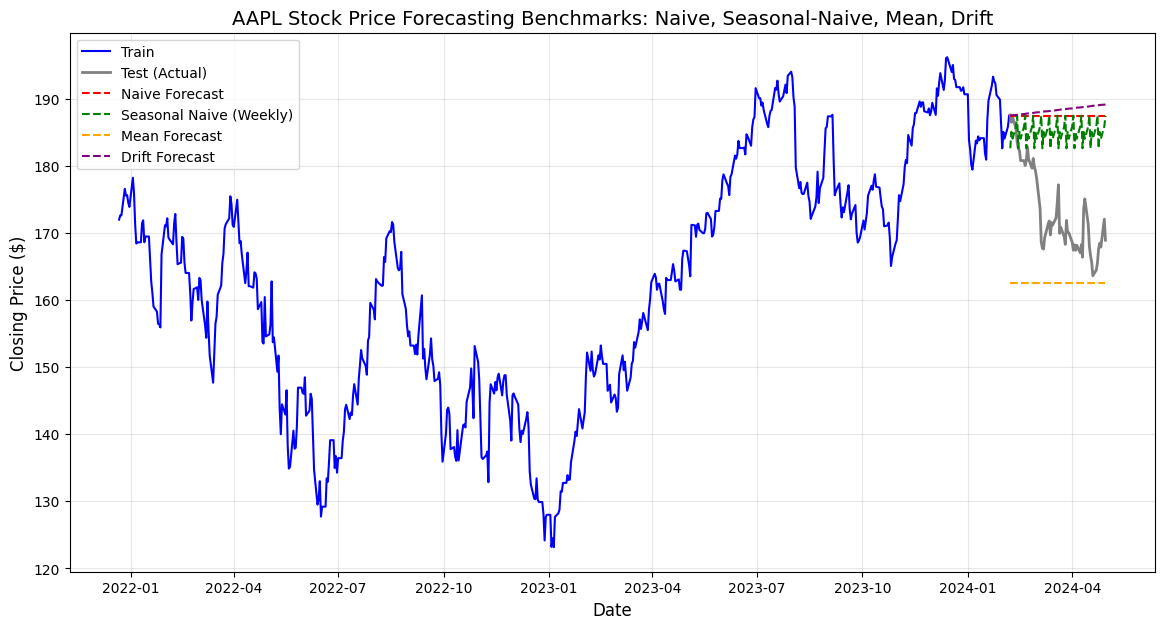

In [43]:
# Visualization of all benchmark forecasts
plt.figure(figsize=(14, 7))

# Plot training and test data
plt.plot(train_aapl.index, train_aapl['Close'], label='Train', color='blue')
plt.plot(test_aapl.index, test_aapl['Close'], label='Test (Actual)', color='grey', linewidth=2)

# Plot benchmark forecasts
plt.plot(y_hat_naive_aapl.index, y_hat_naive_aapl['naive'], label='Naive Forecast', color='red', linestyle='--')
plt.plot(y_hat_snaive_aapl.index, y_hat_snaive_aapl['snaive'], label='Seasonal Naive (Weekly)', color='green', linestyle='--')
plt.plot(y_hat_mean_aapl.index, y_hat_mean_aapl['mean'], label='Mean Forecast', color='orange', linestyle='--')
plt.plot(y_hat_drift_aapl.index, y_hat_drift_aapl['drift'], label='Drift Forecast', color='purple', linestyle='--')

plt.title('AAPL Stock Price Forecasting Benchmarks: Naive, Seasonal-Naive, Mean, Drift', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
# Calculate error metrics for each benchmark
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(actual, predicted, name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'MAPE (%)': mape}

actual = test_aapl['Close'].values

metrics = []
metrics.append(calculate_metrics(actual, y_hat_naive_aapl['naive'].values, 'Naive'))
metrics.append(calculate_metrics(actual, y_hat_snaive_aapl['snaive'].values, 'Seasonal Naive'))
metrics.append(calculate_metrics(actual, y_hat_mean_aapl['mean'].values, 'Mean'))
metrics.append(calculate_metrics(actual, y_hat_drift_aapl['drift'].values, 'Drift'))

metrics_df = pd.DataFrame(metrics)
print("\nBenchmark Model Performance Metrics:")
print("=" * 55)
print(metrics_df.to_string(index=False))


Benchmark Model Performance Metrics:
         Model       MAE      RMSE  MAPE (%)
         Naive 14.207200 15.615367  8.344941
Seasonal Naive 12.065464 13.585651  7.096533
          Mean 10.717756 12.528714  6.055042
         Drift 15.059484 16.561621  8.845927


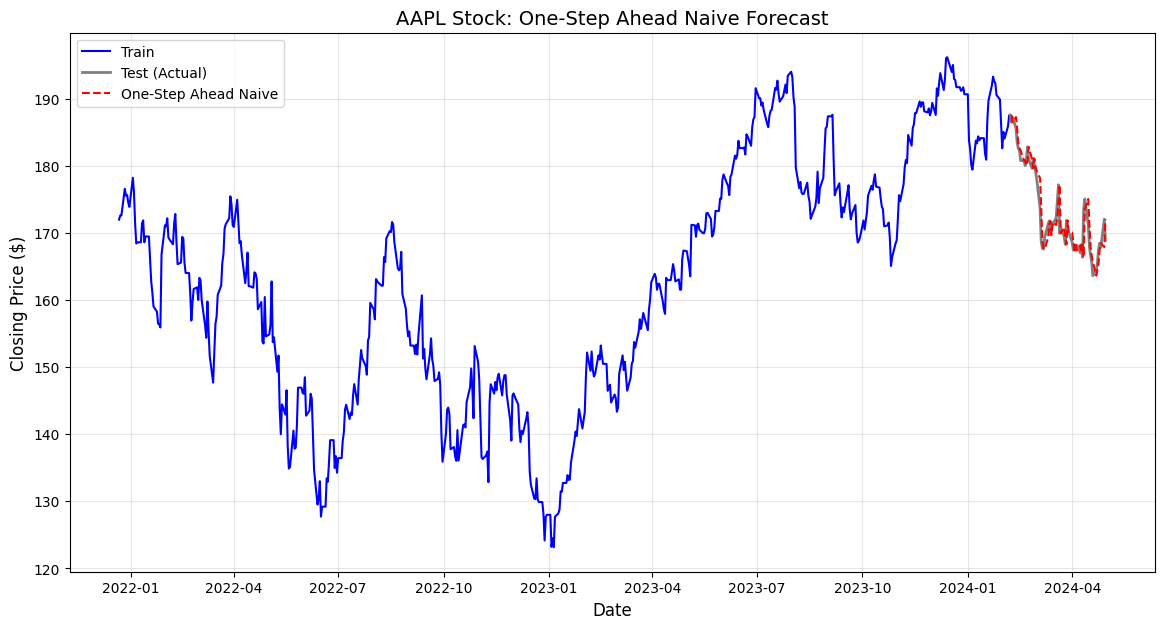


One-Step Ahead Naive Forecast Performance:
MAE: $1.74
RMSE: $2.28
MAPE: 1.01%


In [46]:
# One-step ahead naive forecast for AAPL
plt.figure(figsize=(14, 7))

# Original data (Train and Test)
plt.plot(train_aapl.index, train_aapl['Close'], label='Train', color='blue')
plt.plot(test_aapl.index, test_aapl['Close'], label='Test (Actual)', color='grey', linewidth=2)

# One-step ahead naive forecast (Test set only)
test_shifted_for_naive_aapl = test_aapl['Close'].shift(1)
plt.plot(test_aapl.index, test_shifted_for_naive_aapl, label='One-Step Ahead Naive', color='red', linestyle='--')

plt.title('AAPL Stock: One-Step Ahead Naive Forecast', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate one-step ahead naive error
one_step_actual = test_aapl['Close'].iloc[1:].values
one_step_pred = test_aapl['Close'].shift(1).iloc[1:].values
one_step_metrics = calculate_metrics(one_step_actual, one_step_pred, 'One-Step Naive')
print(f"\nOne-Step Ahead Naive Forecast Performance:")
print(f"MAE: ${one_step_metrics['MAE']:.2f}")
print(f"RMSE: ${one_step_metrics['RMSE']:.2f}")
print(f"MAPE: {one_step_metrics['MAPE (%)']:.2f}%")

### Exercise Summary

In this exercise, we created four benchmark forecasting models for AAPL stock prices:

1. **Naive Forecast**: Uses the last observed price as the prediction for all future periods. Simple but often surprisingly effective for random-walk-like stock prices.

2. **Seasonal Naive Forecast**: Uses a 5-day (weekly) cycle to capture potential day-of-week patterns in stock prices.

3. **Mean Forecast**: Uses the historical average price. Generally performs poorly for trending data.

4. **Drift Forecast**: Extrapolates the overall trend from the training data into the future.

**Key Observations:**
- For stock prices (which often follow a random walk), the naive and one-step-ahead naive forecasts typically perform well
- The mean forecast struggles when there are trends in the data
- The drift forecast can be useful when there's a consistent trend, but may extrapolate incorrectly if the trend changes
- These benchmarks serve as baselines that more sophisticated models should outperform

GREAT JOB!

cheers, Pedram!